ST_Contains (point1): True
ST_Within (point1): True
ST_Intersects (point2): True
ST_Distance (point1 ↔ point2): 0.022360679774997023
ST_Area (m²): 38365190.20347914


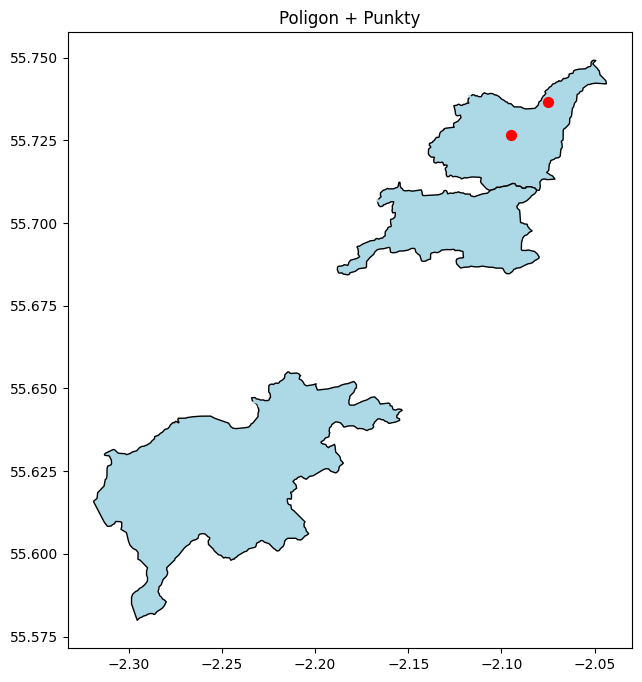

In [9]:
# Zadanie: ST_Area, ST_Distance, ST_Contains, ST_Intersects, ST_Within
# Biblioteka: GeoPandas (zamiast GeoMesa/Sedona/Mosaic – działa w Jupyterze)

import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Wczytanie danych
url = "https://environment.data.gov.uk/catchment-planning/v/c3-plan/OperationalCatchment/3380.geojson"
gdf = gpd.read_file(url)

# Tworzymy punkty wewnątrz poligony
point1 = gdf.geometry.iloc[0].centroid
point2 = Point(point1.x + 0.02, point1.y + 0.01)

# ST_Contains: czy poligon zawiera punkt1
print("ST_Contains (point1):", gdf.geometry.iloc[0].contains(point1))

# ST_Within: czy punkt1 leży w poligonie
print("ST_Within (point1):", point1.within(gdf.geometry.iloc[0]))

# ST_Intersects: czy poligon przecina point2
print("ST_Intersects (point2):", gdf.geometry.iloc[0].intersects(point2))

# ST_Distance: odległość między punktami
print("ST_Distance (point1 ↔ point2):", point1.distance(point2))  #  stopnie

# ST_Area: obliczenie pola powierzchni po przekształceniu 
gdf_m = gdf.to_crs(epsg=3857)  # przeliczenie do metrów
print("ST_Area (m²):", gdf_m.geometry.iloc[0].area)

# Wizualizacja
gdf_points = gpd.GeoSeries([point1, point2], crs="EPSG:4326")
ax = gdf.plot(color='lightblue', edgecolor='black', figsize=(8, 8))
gdf_points.plot(ax=ax, color='red', markersize=50)
plt.title("Poligon + Punkty")
plt.show()